# Welcome to ProgPy's New State Estimator Example!

In this example, we'll illustrate the creation of a new state estimator.

A basic state estimator is constructed by subclassifying the [StateEstimator](https://nasa.github.io/progpy/api_ref/prog_algs/StateEstimator.html) class. This StateEstimator is then demonstrated with a ThrownObject model.

### Importing Modules

In [ ]:
from progpy.state_estimators import StateEstimator
from progpy.uncertain_data import ScalarData
import random
from progpy.models.thrown_object import ThrownObject

We'll create a not very effective state estimator, but one that technically works. It blindly stumbles towards the correct state by randomly generating a new state each timestep and selecting the state that's most consistent with the measurements.

I do not in any universe recommend using this state estimator for anything other then demonstrating a bad state estimator. It's intended as an example of creating a new state estimation algorithm.

This state estimator was created by copying the state estimator template and filling out each function with the logic for this algorithm

In [ ]:
class BlindlyStumbleEstimator(StateEstimator):
    def __init__(self, model, x0, measurement = None):
        """
        Initialize the state estimator

        Args:
            model (PrognosticsModel): Model to be used in state estimation
            x0 (dict): Initial State
        """
        self.m = model
        self.state = x0
    
    def estimate(self, t, u, z):
        """
        Update the state estimate

        Args:
            t (Number): Time
            u (dict): Inputs (load) for time t
            z (dict): Measured output at time t
        """
        # Generate new candidate state
        x2 = {key : float(value) + 10*(random.random()-0.5) for (key,value) in self.state.items()}

        # Calculate outputs
        z_est = self.m.output(self.state)
        z_est2 = self.m.output(x2)

        # Now score them each by how close they are to the measured z
        z_est_score = sum([abs(z_est[key] - z[key]) for key in self.m.outputs])
        z_est2_score = sum([abs(z_est2[key] - z[key]) for key in self.m.outputs])

        # Now choose the closer one
        if z_est2_score < z_est_score: 
            self.state = x2
    
    @property
    def x(self):
        """
        Measured state
        """
        return ScalarData(self.state)

We define our `x` function to measure the state using the [ScalarData](https://nasa.github.io/progpy/api_ref/prog_algs/UncertainData.html#implemented-uncertaindata-types) Class.

Next, we'll have to define the `estimate` function. This function will be called by the `StateEstimator` class to estimate the state of the system. The function takes in the current state of the system, the current control input, and the current measurement. It returns the estimated state of the system.

_For convenience sake, here is illustration of the structure of the packages_:

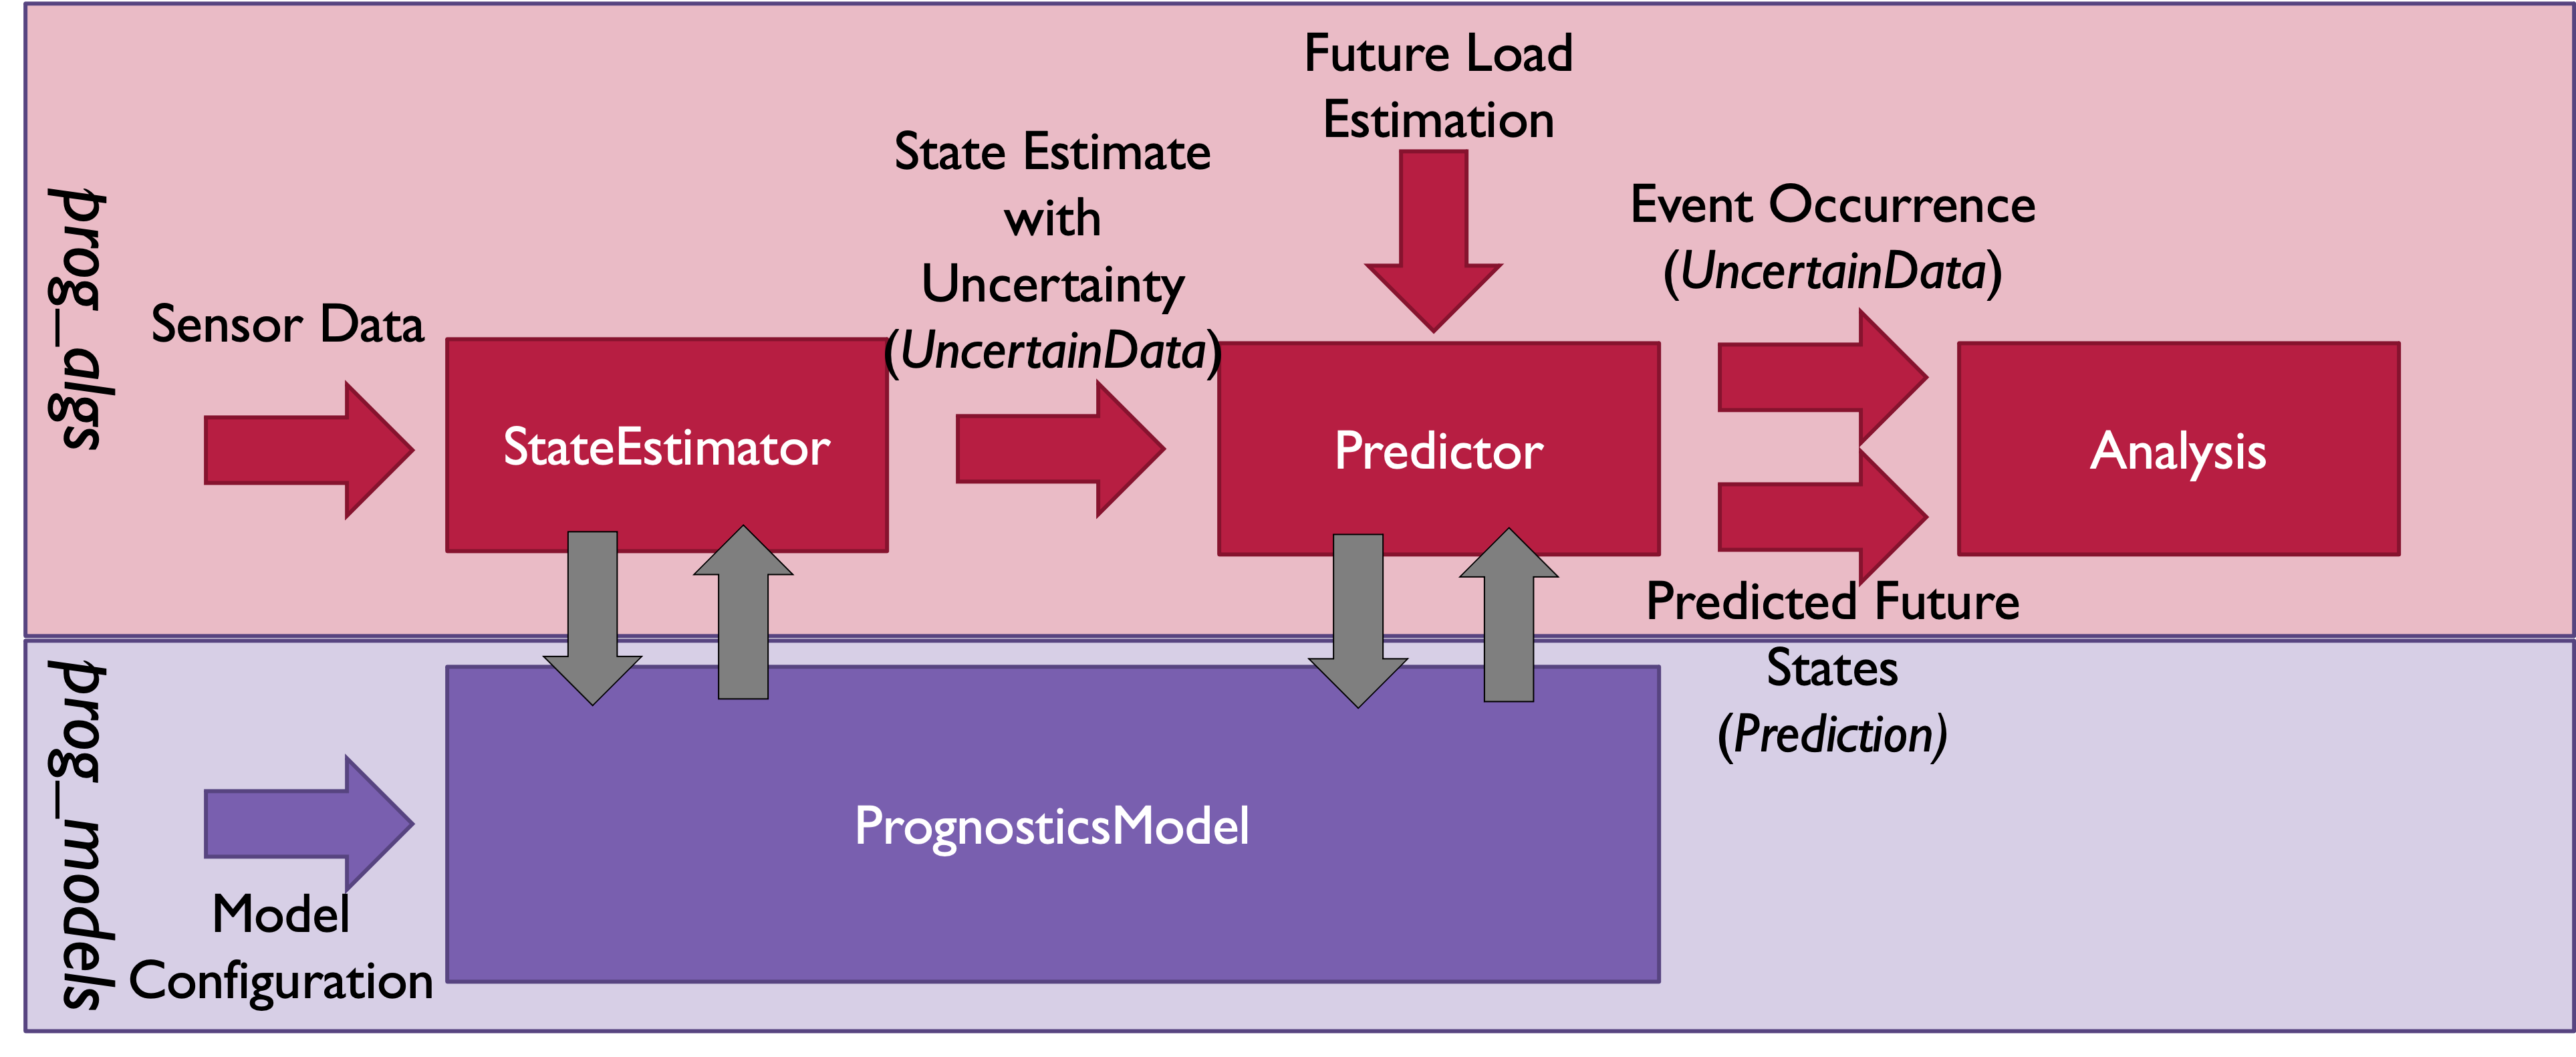

Let's use our newly created State Estimator in an example!


For our example, we'll be simulating the model forward using the StateEstimator and _won't_ be accomplishing the __Predictor__ step.

In [ ]:
# First we define the model to be used with the state estimator
m = ThrownObject()

Our ThrownModel() object does not define the dx(

Let's pretend we have no idea what the state is, we'll provide an estimate of 0.


In [ ]:
x0 = {key : 0 for key in m.states}
filt = BlindlyStumbleEstimator(m, x0)

Now, let's simulate the model forward and see what it looks like. We'll use the same initial conditions as before.

In [ ]:
dt = 0.1
x = m.initialize()
print('t: {}. State: {} (Ground truth: {})'.format(0, filt.x.mean, x))
for i in range(1, int(8.4/dt)):
    # Update ground truth state
    x = {key : x[key] + m.next_state(x, u=None, dt=dt)[key] * dt for key in m.states}

    # Run estimation step
    filt.estimate(i*dt, None, m.output(x))

    # Print result
    print('t: {}. State: {} (Ground truth: {})'.format(i*dt, filt.x.mean, x))

The results show that our state estimator is estimating the state with a significant delay. As prefaced earlier, this is a very simple state estimator and it is not very accurate. It is only used to show the concept of state estimation.

We recommend using our [Included State Estimators](https://nasa.github.io/progpy/api_ref/prog_algs/StateEstimator.html#included-state-estimators), as they are proven to be effective and efficient. However, if you would like to implement your own state estimator, you can do so by inheriting from the [StateEstimator](https://nasa.github.io/progpy/api_ref/prog_algs/StateEstimator.html) class as demonstrated in this example.



For more information on ProgPy, please refer to our ProgPy [Documentation](https://nasa.github.io/progpy/index.html).